# BUDS Report 09: Row Filtering

### Table of Contents

1.  <a href='#section 1'>Filtering with `where`</a>
    
2. <a href='#section 2'>Filtering with `take`</a>

3. <a href='#section 3'>Visualizations</a>

4. <a href='#section 4'>More Questions</a>

5. <a href='#section 5'>One Last Look at the CES Data</a>

6. <a href='#section 6'>An Additional Question</a>

In [1]:
# run this cell

from datascience import *
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

### The Data <a id='data'></a>

Let's continue to work with the US census data, again just looking at years 2010 and 2014.

As a reminder, the "SEX" column contains numeric codes: `0` stands for the total, `1` for male, and `2` for female. The "AGE" column contains ages in completed years, but the special value `999` is a sum of the total population. The combination of SEX = `0` and AGE = `999` tells us that the corresponding row has the data for all sexes and all ages.

In [2]:
# a local copy can be accessed here in case census.gov moves the file:
# data = path_data + 'nc-est2015-agesex-res.csv'
data = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv'

# these repeat some steps that were done in Report 08
full_census = Table.read_table(data)
partial_census = full_census.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014')
us_pop = partial_census.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2014', '2014')
us_pop.sort('AGE')

SEX,AGE,2010,2014
0,0,3951330,3949775
1,0,2018420,2020326
2,0,1932910,1929449
0,1,3957888,3949776
1,1,2020332,2018401
2,1,1937556,1931375
0,2,4090862,3959664
1,2,2088685,2023673
2,2,2002177,1935991
0,3,4111920,4007079


## 1. Filtering with `where`  <a id='section 1'></a>

Often times, we only want to analyze a certain subset of our data at a time.

For example, let's filter our data to only look at the population counts of males.

<div class="alert alert-warning">
    <b>PRACTICE:</b> First, write down what the table's numeric code for the male population is. Then, assign <code>male_pop</code> to a table with the male subset of our data.
    </div>

_Written Answer:_

In [ ]:
...

In [3]:
# SOLUTION
male_pop = us_pop.where('SEX', are.equal_to(1))
male_pop

SEX,AGE,2010,2014
1,0,2018420,2020326
1,1,2020332,2018401
1,2,2088685,2023673
1,3,2101272,2049596
1,4,2084312,2044517
1,5,2076573,2044339
1,6,2079410,2111060
1,7,2063139,2122832
1,8,2054462,2105618
1,9,2107037,2097690


As we can see in the table above, we've chosen only a subset of the rows of the original table -- specifically the rows corresponding to male census participants.

In the following Markdown cell, translate the code you wrote into a regular English statement that both describes what you're doing and uses the variable names and function names in it.

_Written Answer:_

<div class="alert alert-warning">
    <b>PRACTICE:</b> Now select only the rows corresponding to the female population.
   </div>

In [ ]:
female_pop = ...
female_pop

In [4]:
# SOLUTION
female_pop = us_pop.where('SEX', are.equal_to(2))
female_pop

SEX,AGE,2010,2014
2,0,1932910,1929449
2,1,1937556,1931375
2,2,2002177,1935991
2,3,2010648,1957483
2,4,1993239,1961199
2,5,1988080,1962561
2,6,1993603,2024870
2,7,1979907,2032494
2,8,1971142,2015285
2,9,2018378,2010659


A special feature of `are.equal_to(...)` is that it is the default predicate for `tbl.where(...)`. This means if we write a `where` expression without writing `are.equal_to(...)`, then it would work as if it was there.

Here is an example. We can assign the name `ten_yr_males` to a table whose rows are the rows in the `male_pop` table `where` the AGEs `are` `equal` `to` `10`.

In [5]:
ten_yr_males = male_pop.where("AGE", 10)
ten_yr_males

SEX,AGE,2010,2014
1,10,2142167,2100262


In [6]:
# this works the same when we include are.equal_to(...)
male_pop.where("AGE", are.equal_to(10))

SEX,AGE,2010,2014
1,10,2142167,2100262


### `where` <a id='subsection 1a'></a>

Now let's dive into the details a bit more.  `where` takes 2 arguments:

1. The name of a column.  `where` finds rows where that column's values meet some condition.
2. A predicate that describes the condition that the column needs to meet.

The predicate in the examples above called the predicate `are.equal_to` with the values we wanted, 1 (or 2).  We'll see other predicates next.

`where` returns a table that's a copy of the original table, but **with only the rows that meet the given predicate**.

So far we've only been using `where` with the predicate that requires finding the values in a column to be *exactly* equal to a certain value. However, there are many other predicates. Here are a few:

|Predicate|Example|Result|
|-|-|-|
|`are.equal_to`|`are.equal_to(50)`|Find rows with values equal to 50|
|`are.equal_to`|`are.equal_to("hello")`|Find rows with values equal to "hello"|
|`are.not_equal_to`|`are.not_equal_to(50)`|Find rows with values not equal to 50|
|`are.above`|`are.above(50)`|Find rows with values above (and not equal to) 50|
|`are.above_or_equal_to`|`are.above_or_equal_to(50)`|Find rows with values above 50 or equal to 50|
|`are.below`|`are.below(50)`|Find rows with values below 50|
|`are.between`|`are.between(2, 10)`|Find rows with values above or equal to 2 and below 10|
|`are.containing`| `are.containing("i")`| Find rows with string values that contain the letter i.

You can find a few more in the [Python reference sheet](http://data8.org/su22/python-reference.html).

Let's go back to the census data.

<div class="alert alert-warning">
    <b>PRACTICE:</b> Display the census data such that the largest ages appear first.
    </div>

In [ ]:
...

In [7]:
# SOLUTION
us_pop.sort("AGE", descending = True)

SEX,AGE,2010,2014
0,999,309346863,318907401
1,999,152088043,156955337
2,999,157258820,161952064
0,100,54410,71626
1,100,9352,13618
2,100,45058,58008
0,99,32178,41468
1,99,6104,8951
2,99,26074,32517
0,98,47037,59726


<div class="alert alert-warning">
    <b>PRACTICE:</b> Remember the numerical code 999 stands for total (across all ages), but let's say we're only interested in specific ages (NOT their total). We could do another <code>where(...)</code> to accomplish this. Try doing so in the next cell and assigning this table to the variable <code>pop_by_age</code>. It should look similar to the previous table but without the rows with ages 999.
    </div>

In [ ]:
...

In [8]:
# SOLUTION
pop_by_age = us_pop.where("AGE", are.below(999)).sort("AGE", descending= True)
pop_by_age

SEX,AGE,2010,2014
0,100,54410,71626
1,100,9352,13618
2,100,45058,58008
0,99,32178,41468
1,99,6104,8951
2,99,26074,32517
0,98,47037,59726
1,98,9505,13518
2,98,37532,46208
0,97,68893,83089


<div class="alert alert-warning">
    <b>PRACTICE:</b> Write some code to only select population counts corresponding to males and females (but not their totals). Remember, in the "SEX" column, 0 represents a total. Assign this to the name <code>both_sexes</code>.
   </div>

In [ ]:
...

In [9]:
# SOLUTION
both_sexes = pop_by_age.where("SEX", are.above(0))
both_sexes

SEX,AGE,2010,2014
1,100,9352,13618
2,100,45058,58008
1,99,6104,8951
2,99,26074,32517
1,98,9505,13518
2,98,37532,46208
1,97,14775,20310
2,97,54118,62779
1,96,22022,31053
2,96,75139,89432


<div class="alert alert-warning">
    <b>PRACTICE:</b> One of the nice things about code is that there are several ways of doing something. Write another <code>where</code> expression which will do the same thing as the above cell. Use a different predicate.
   </div>

In [ ]:
...

In [10]:
# SOLUTION
both_sexes = pop_by_age.where("SEX", are.between(1, 3))
both_sexes

SEX,AGE,2010,2014
1,100,9352,13618
2,100,45058,58008
1,99,6104,8951
2,99,26074,32517
1,98,9505,13518
2,98,37532,46208
1,97,14775,20310
2,97,54118,62779
1,96,22022,31053
2,96,75139,89432


<div class="alert alert-warning">
    <b>PRACTICE:</b> Once again, try creating the same table by using a different predicate.
   </div>

In [ ]:
...

In [11]:
# SOLUTION
both_sexes = pop_by_age.where("SEX", are.between_or_equal_to(1, 2))
both_sexes

SEX,AGE,2010,2014
1,100,9352,13618
2,100,45058,58008
1,99,6104,8951
2,99,26074,32517
1,98,9505,13518
2,98,37532,46208
1,97,14775,20310
2,97,54118,62779
1,96,22022,31053
2,96,75139,89432


These are all different ways to write the same expression. Some predicates are used more often than others, but there is no added benefit to using a specific predicate in the situation above. They all work the same. The only benefit would be less typing for shorter predicates. 

<div class="alert alert-warning">
    <b>PRACTICE:</b> Why does this code not produce the same table as the others above?
    </div>

In [12]:
pop_by_age.where("SEX", are.equal_to(1)).where("SEX", are.equal_to(2))

SEX,AGE,2010,2014


_Written Answer:_

## 2. Filtering with `take` <a id='section 2'></a>

<div class="alert alert-warning">
    <b>PRACTICE:</b> Let's combine what we did above to remove totals of ages and of sex and only look at the year 2014. This table should have information on both males and females of all ages in the year 2014. Try it in the cell below.
    </div

In [ ]:
us_pop_2014 = ...
us_pop_2014_sorted = ...
us_pop_2014_sorted 

In [13]:
# SOLUTION
us_pop_2014 = us_pop.where("SEX", are.above(0)).where("AGE", are.below(999)).drop("2010")
us_pop_2014_sorted = us_pop_2014.sort("AGE", descending = True)
us_pop_2014_sorted 

SEX,AGE,2014
1,100,13618
2,100,58008
1,99,8951
2,99,32517
1,98,13518
2,98,46208
1,97,20310
2,97,62779
1,96,31053
2,96,89432


Remember, `tbl.take()` allows us to specify which row numbers of the above table we want to look at. Each row has an index like an array, which is the numbers we reference inside of `take(...)`

In [14]:
# run this cell
us_pop_2014_sorted.take(0) 

SEX,AGE,2014
1,100,13618


This lets us look at just the first row of the table. (Remember, row numbers start with 0!)

<div class="alert alert-warning">
    <b>PRACTICE:</b> Fill in the blanks to only select population counts corresponding to males and females between ages 98 and 100.
    </div>
    
*Hint:* how many rows of the above table do we want?

In [ ]:
seniors_2014 = us_pop_2014_sorted.take(np.arange(..., ...))
seniors_2014

In [15]:
# SOLUTION
seniors_2014 = us_pop_2014_sorted.take(np.arange(0, 6))
seniors_2014

SEX,AGE,2014
1,100,13618
2,100,58008
1,99,8951
2,99,32517
1,98,13518
2,98,46208


Another way to write this code is to use where. See the below code cells and notice that we don't need our table to be sorted.

In [16]:
seniors_2014 = us_pop_2014_sorted.where("AGE", are.between(98, 101)) 
seniors_2014

SEX,AGE,2014
1,100,13618
2,100,58008
1,99,8951
2,99,32517
1,98,13518
2,98,46208


In [17]:
seniors_2014 = us_pop_2014.where("AGE", are.between(98, 101))
seniors_2014 = seniors_2014.sort("AGE", descending=True)
seniors_2014

SEX,AGE,2014
1,100,13618
2,100,58008
1,99,8951
2,99,32517
1,98,13518
2,98,46208


Depending on the situation, one of these methods may be better than others. When would you prefer to use `where` and when would you prefer to use `take`?

_Written Answer:_

## 3. Visualizations  <a id='section 3'></a>

To understand how our data really looks, it would be easier to create a visualization using this table. Let's compare "AGE" to the population in 2014.

Are these columns categorical variables? Numerical variables? How can you tell?

_Written Answer:_

Based on your answer, what kind of visualization would be best for this data?

_Written Answer:_

<div class="alert alert-warning">
    <b>PRACTICE:</b> Create this visualization in the cell below.
    </div>

In [ ]:
...

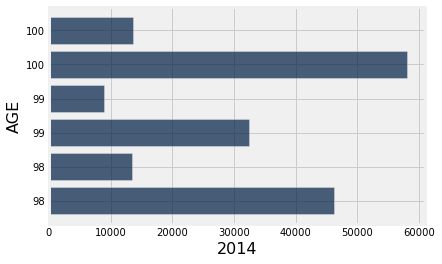

In [18]:
# SOLUTION
seniors_2014.barh("AGE", "2014")

What do you notice about this visualization?

_Written Answer:_

How does your visualization compare to the table called `seniors_2014`?

_Written Answer:_

## 4. More Questions on `where` and Strings:  <a id='section 4'></a>

If our original table had sex represented as text or a string, then we would have to use a different where expression to choose between males and females.

In [19]:
# this code adds the string version of sex in a new column

fem_str = female_pop.with_column("SEX (str)" ,"female")
male_str = male_pop.with_column("SEX (str)" , "male")

str_sex = fem_str.with_rows(male_str.rows).sort('AGE', descending=True)
str_sex

SEX,AGE,2010,2014,SEX (str)
2,999,157258820,161952064,female
1,999,152088043,156955337,male
2,100,45058,58008,female
1,100,9352,13618,male
2,99,26074,32517,female
1,99,6104,8951,male
2,98,37532,46208,female
1,98,9505,13518,male
2,97,54118,62779,female
1,97,14775,20310,male


Let's try to only get rows with females. There are multiple ways to do this.

<div class="alert alert-warning">
    <b>PRACTICE:</b> Try doing so with <code>are.equal_to(...)</code>.
    </div>

In [ ]:
...

In [20]:
# SOLUTION
str_sex.where("SEX (str)", are.equal_to("female"))

SEX,AGE,2010,2014,SEX (str)
2,999,157258820,161952064,female
2,100,45058,58008,female
2,99,26074,32517,female
2,98,37532,46208,female
2,97,54118,62779,female
2,96,75139,89432,female
2,95,99341,113732,female
2,94,126948,155637,female
2,93,158882,199426,female
2,92,205379,243648,female


<div class="alert alert-warning">
    <b>PRACTICE:</b> Now do so without writing a predicate at all.
    </div>

In [ ]:
...

In [21]:
# SOLUTION
str_sex.where("SEX (str)", "female")

SEX,AGE,2010,2014,SEX (str)
2,999,157258820,161952064,female
2,100,45058,58008,female
2,99,26074,32517,female
2,98,37532,46208,female
2,97,54118,62779,female
2,96,75139,89432,female
2,95,99341,113732,female
2,94,126948,155637,female
2,93,158882,199426,female
2,92,205379,243648,female


<div class="alert alert-warning">
    <b>PRACTICE:</b> In this next cell, use the predicate <code>are.containing(...)</code>.
    </div>

In [ ]:
...

In [22]:
# SOLUTION
str_sex.where("SEX (str)", are.containing("fe"))

SEX,AGE,2010,2014,SEX (str)
2,999,157258820,161952064,female
2,100,45058,58008,female
2,99,26074,32517,female
2,98,37532,46208,female
2,97,54118,62779,female
2,96,75139,89432,female
2,95,99341,113732,female
2,94,126948,155637,female
2,93,158882,199426,female
2,92,205379,243648,female


<div class="alert alert-warning">
    <b>PRACTICE:</b> See if you can come up with another way to create the table above using <code>are.below(...)</code>.
    </div>

In [ ]:
...

In [23]:
# SOLUTION
str_sex.where("SEX (str)", are.below("g"))

SEX,AGE,2010,2014,SEX (str)
2,999,157258820,161952064,female
2,100,45058,58008,female
2,99,26074,32517,female
2,98,37532,46208,female
2,97,54118,62779,female
2,96,75139,89432,female
2,95,99341,113732,female
2,94,126948,155637,female
2,93,158882,199426,female
2,92,205379,243648,female


<div class="alert alert-warning">
    <b>PRACTICE:</b> Finally, create this table with <code>are.not_equal_to(...)</code>.
    </div>

In [ ]:
...

In [24]:
# SOLUTION
str_sex.where("SEX (str)", are.not_equal_to("male"))

SEX,AGE,2010,2014,SEX (str)
2,999,157258820,161952064,female
2,100,45058,58008,female
2,99,26074,32517,female
2,98,37532,46208,female
2,97,54118,62779,female
2,96,75139,89432,female
2,95,99341,113732,female
2,94,126948,155637,female
2,93,158882,199426,female
2,92,205379,243648,female


## 5. One Last Look at the CES Data <a id='section 5'></a>

In order to show an application of `where`, let's take a look at the familiar CalEnviroScreen data set.

Run the following cell to get our table.

In [25]:
ces_data = Table.read_table("ces_data_v2.csv")

# this does a bit of data cleaning
# don't worry about understanding these next few lines of code
for i in np.arange(ces_data.num_columns):
    if i != 3 and i != 11:
        ces_data = ces_data.where(i, are.above_or_equal_to(0))
ces_data

Census.Tract,CES.3.0.Score,Total.Population,California.County,Hispanic....,White....,African.American....,Native.American....,Asian.American....,Other....,ZIP,Longitude,Latitude,Ozone,PM2.5,Diesel.PM,Drinking.Water,Pesticides,Tox..Release,Traffic,Cleanup.Sites,Groundwater.Threats,Haz..Waste,Imp..Water.Bodies,Solid.Waste,Pollution.Burden,Asthma,Low.Birth.Weight,Poverty,Unemployment
6019001100,94.09,3174,Fresno,65.3,4.2,24.6,0.5,3.5,1.8,93706,-119.782,36.7097,0.065,15.4,48.524,681.2,2.75,18552,909.14,80.5,45.75,0.795,0,21.75,79.96,131.64,7.44,76.3,17.6
6071001600,90.68,6133,San Bernardino,91.1,5.8,0.7,0.3,1.4,0.7,91761,-117.618,34.0578,0.062,13.31,38.556,904.66,1.37,7494.24,782.26,66.2,36,1.25,5,12,81.19,60.66,7.04,72.5,12.3
6019000200,85.97,3167,Fresno,63.6,5.3,18.9,0.6,9.8,1.8,93706,-119.806,36.7355,0.062,15.4,47.445,681.2,3.03,12454.9,576.52,22,30.25,0.2,0,2.5,71.16,142.12,10.16,86.8,16.1
6077000801,82.49,6692,San Joaquin,57.4,6,12.5,0.3,20.9,2.8,95203,-121.315,37.9405,0.046,12.54,24.117,278.76,12.93,2387.78,1305.01,50.1,132.1,0.795,19,27,74.48,142.17,6.23,61.3,19.6
6019001500,82.03,2206,Fresno,71.8,21.4,1.2,0.5,4.5,0.6,93725,-119.718,36.6816,0.065,15.4,18.846,1000.24,3518.41,21790.7,435.16,60,54.2,13.1,0,50.8,80.2,90.48,4.5,66.4,18.6
6037204920,80.73,2598,Los Angeles,98.1,1.2,0.1,0.1,0.2,0.3,90023,-118.197,34.0175,0.046,12.89,56.52,714.48,0,39040.2,2943.44,36.7,25,4.93,7,3.85,76.73,68.74,7.35,66.4,11.6
6077000300,80.18,2396,San Joaquin,51.8,16.4,16.4,1.3,9.9,4.1,95203,-121.302,37.9524,0.046,13.44,21.76,278.76,172.49,707.536,885.52,89.7,149.05,0.135,14,2.3,68.27,169.56,8.36,76.2,14.4
6019001000,80.13,4106,Fresno,52.7,2.7,28.7,0.4,14.3,1.2,93706,-119.804,36.6978,0.065,15.4,20.848,788.02,1435.93,6996.96,243.54,15.45,20,0,0,10,66.88,142.28,7.83,74.5,20
6037206050,79.03,2146,Los Angeles,79.3,8.9,4.1,0.1,7.2,0.5,90023,-118.224,34.0299,0.046,12.89,53.958,664.07,0,10378.2,2810.82,36.05,16.25,10.025,7,22.1,77.09,58.03,6.71,75.7,28.5
6019000400,78.53,6343,Fresno,78,9.1,5.8,0.8,5.3,0.9,93721,-119.776,36.7277,0.065,15.4,54.356,681.2,114.96,125384,815.36,15.95,13.5,0.755,0,0.5,73.89,107.8,4.79,83.4,23.5


Look at a specific county or group of counties. This is similar to what was done for you in previous notebooks, but try doing it on your own here.

In [ ]:
...

In [26]:
# SOLUTION
sf = ces_data.where("California.County", "San Francisco")
sf

Census.Tract,CES.3.0.Score,Total.Population,California.County,Hispanic....,White....,African.American....,Native.American....,Asian.American....,Other....,ZIP,Longitude,Latitude,Ozone,PM2.5,Diesel.PM,Drinking.Water,Pesticides,Tox..Release,Traffic,Cleanup.Sites,Groundwater.Threats,Haz..Waste,Imp..Water.Bodies,Solid.Waste,Pollution.Burden,Asthma,Low.Birth.Weight,Poverty,Unemployment
6075023103,51.58,3725,San Francisco,16.2,3.5,55.8,0.3,18.1,6.1,94124,-122.376,37.7356,0.03,8.69794,92.89,171.2,0,217.431,270.12,46.45,142.5,4.135,14,8.1,50.19,135.72,7.54,84.6,17.7
6075023200,50.36,4582,San Francisco,38.8,4.5,38.9,0.3,14.8,2.6,94124,-122.386,37.7278,0.03,8.69794,92.89,171.2,0,207.568,380.39,37.45,110.05,0.95,10,16.85,50.22,135.72,8.9,37.2,14.8
6075017902,49.09,2880,San Francisco,23,27.2,23.5,0.6,18.8,7,94130,-122.42,37.8619,0.03,8.69794,99.411,271.47,0,345.66,3160.99,159,150,0.2,10,2,55.66,95.9,5.97,70.4,13.3
6075023400,48.25,3660,San Francisco,33.5,3.5,33,0.2,25.2,4.8,94124,-122.39,37.7216,0.03,8.69794,65.555,171.2,0,203.143,552.72,22.75,21.75,0.025,11,13.8,45.01,135.72,8.02,56.4,14.9
6075023102,47.15,3478,San Francisco,16.2,4.9,61,0.4,13.7,3.8,94124,-122.384,37.7345,0.03,8.69794,92.89,171.2,0,212.477,294.99,19.5,24.5,3.325,14,5.65,47.31,135.72,8.75,62.6,18.5
6075061200,44.19,4089,San Francisco,36.7,7.6,31.3,0.4,21.4,2.5,94124,-122.39,37.737,0.03,8.69794,92.89,171.2,0,212.08,388.72,5.65,2.9,2.1,14,6,41.62,135.72,6.67,45.5,15.3
6075012502,42,3821,San Francisco,21.1,20,13.9,0.6,41.1,3.3,94102,-122.413,37.7839,0.03,8.69794,106.3,171.2,0,232.579,572.51,16.3,2.3,1.41,10,0,39.69,122.23,7.59,75.1,14.1
6075017601,41.93,7630,San Francisco,13.6,31.6,12.9,1,36.4,4.5,94103,-122.411,37.7794,0.03,8.69794,103.215,171.2,0,231.205,845.21,59.85,9.25,5.08,10,0,45.48,98.44,8.24,52.3,4.6
6075023300,40.59,2624,San Francisco,21,2.6,10.8,0.5,63.1,2,94124,-122.398,37.7254,0.03,8.69794,90.157,171.2,0,202.226,1635.76,7.35,1.5,0.225,10,4.6,44.65,124.54,6.07,27.4,11
6075023001,39.04,5216,San Francisco,15,5.4,14,0.1,63.8,1.6,94124,-122.402,37.7352,0.03,8.69794,92.89,171.2,0,206.021,1767.07,8,3,0.935,10,8.25,48.51,111.52,3.28,39.8,10.8


Now that you have access to a table of one county's data, check that its data are **consistent**.

<div class="alert alert-warning">
    <b>PRACTICE:</b> The total population of each tract should be equal to the sum of the total populations of each race. Complete the multi-step process to ensure that your county's data is clean. Find the total population of the county, then the total Hispanic population of the county, etc. Then, assign <code>good_percentages</code> to a boolean statement that determines whether our data is clean or not. To do so, you can compare <code>pop</code> to <code>all_races</code> using <code>math.isclose(...)</code>. Read the documentation by running the next cell and clicking <b><code>Shift + Tab</code></b>.

Allow for the count to be off by 3 people (ie. if <code>pop</code> is 45 people and <code>all_races</code> is 48 people, <code>good_percentages</code> should evaluate to True.
    </div>

In [27]:
math.isclose(1, 1)

True

In [ ]:
pop = ...

hisp = ...
white = ...
black = ...
native = ...
asian = ...
other = ...
all_races = ...

good_percentages = ...
good_percentages

In [28]:
# SOLUTION
# can also be done without taking the sum
pop = sum(sf.column('Total.Population'))

hisp = sum(sf.column('Total.Population') * sf.column('Hispanic....') / 100)
white = sum(sf.column('Total.Population') * sf.column('White....') / 100)
black = sum(sf.column('Total.Population') * sf.column('African.American....') / 100)
native = sum(sf.column('Total.Population') * sf.column('Native.American....') / 100)
asian = sum(sf.column('Total.Population') * sf.column('Asian.American....') / 100)
other = sum(sf.column('Total.Population') * sf.column('Other....') / 100)
all_races = hisp + white + black + native + asian + other

good_percentages = math.isclose(pop, all_races, abs_tol = 3)
good_percentages

True

The total population of each tract should be equal to the sum of all the races' populations.

- $Total Population = Hispanic Population + White Population + ... + Other Population$
    
If this is not true, then the data we are working with are **not consistent**. We could check this by calculating this equation exactly, but it would be a bit tedious. The race columns in `ces_data` are not in terms of population but are in *percentages*.
    
An alternative method of checking this is by making sure that the sum of each tract's race percentages add up to 100%. There might have been some rounding errors, so let's allow for percentages that are a little bit off.
    
<div class="alert alert-warning">
    <b>PRACTICE:</b> Assign <code>clean_percentages</code> to a statement that evaluates to True if each tract meets the above criteria. See the following steps to understand the process more.
    
1. For each tract, find out what the sum of race percentages adds up to. Assign this to <code>sum_race_percentages</code>. Because this process is repeated for a bunch of different tracts, you should use array arithmetic in this step and array comparisons later.
    
2. Round the data of <code>sum_race_percentages</code> to the nearest integer using <code>np.round(array)</code> and check if they're equal to 100. Checking if a value is equal to 100 will evaluate to a boolean, so doing this comparison with an array will evaluate to an array of booleans. Assign this to the variable <code>close_to_100</code>.
    
2. If all of the tracts are consistent, they should all evaluate to True. Find out how many of the tracts evaluated to True and assign this to <code>num_consistent</code>.
    
3. Find out how many tracts there are total and assign this to <code>num_tracts</code>. If all tracts are consistent, then <code>num_consistent</code> should be equal to <code>num_tracts</code>; assign this to <code>clean_percentages</code>.
    </div>
    
*Hint:* Some functions that may be helpful are `np.round(array)`, `np.count_nonzero(array)`, and `len(array)`.

In [ ]:
# for all tracts, find the sum of all race percentages
sum_race_percentages = ...

# for all tracts, round the sum of all race percentages and compare it to 100
close_to_100 = ...

# find out how many of these sums are close to 100
num_consistent = ...

# find out how many tracts there are total
num_tracts = ...

# compare num_consistent to num_tracts
clean_percentages = ...

In [29]:
# for all tracts, find the sum of all race percentages
sum_race_percentages = sf.column('Hispanic....') + sf.column('White....') + sf.column('African.American....') + sf.column('Native.American....') + sf.column('Asian.American....') + sf.column('Other....')

# for all tracts, round the sum of all race percentages and compare it to 100
close_to_100 = np.round(sum_race_percentages) == 100

# find out how many of these sums are close to 100
num_consistent = np.count_nonzero(close_to_100)
print("# consistent tracts: " + str(num_consistent))

# find out how many tracts there are total
num_tracts = len(close_to_100)
print("# tracts total: " + str(num_tracts))

# compare num_consistent to num_tracts
clean_percentages = num_consistent == num_tracts
clean_percentages

# consistent tracts: 188
# tracts total: 188


True

Let's go back to the original census data.

<div class="alert alert-warning">
    <b>PRACTICE:</b> Create an array that contains which counties have a population tract of 5000 people or larger and a CalEnviroScreen score that's larger than 76. The items in the array should be listed in alphabetical order with unique county names appearing only once. 
    
If you're getting stuck, try breaking this problem down into multiple steps.
    </div>

In [ ]:
...

In [30]:
# SOLUTION
filtered = ces_data.where("Total.Population", are.above_or_equal_to(5000)).where("CES.3.0.Score", are.above(76))
filtered.sort("California.County", distinct=True).column("California.County")

array(['Fresno ', 'Kern ', 'San Bernardino', 'San Joaquin'], dtype='<U15')

Here's a more challenging question. Feel free to discuss it with your fellow interns and your group facilitators.

<div class="alert alert-warning">
    <b>PRACTICE:</b> 76 was an arbitrary choice for the CalEnviroScreen score. Let's instead find what CalEnviroScreen score is greater than about 95% of the other CES scores (and therefore less than about 5% of the CES scores).
    
If we know that <code>ces_data</code> has 7711 census tracts, how many census tracts make up about 95% of the data? Round to the nearest integer and use that number to find the answer to this question.
    
If we sort ten items in ascending order and take the 3rd item (in index 2), how many items are greater than it? If we sort those same ten items in *descending* order and take the 3rd item (in index 2), how many items are greater than it?
    </div>

_Written Answer:_

In [ ]:
abt_95_pct = ...
index = ...

tract_at_95_pct = ...
ces_at_95_pct = ...
ces_at_95_pct

In [31]:
# SOLUTION
abt_95_pct = int(ces_data.num_rows * 0.95)
index = abt_95_pct - 1

tract_at_95_pct = ces_data.sort("CES.3.0.Score").take(index)
ces_at_95_pct = tract_at_95_pct.column("CES.3.0.Score").item(0)
ces_at_95_pct

57.61

### Downloading as PDF

Download this notebook as a pdf by clicking <b><code>File > Download as > PDF via LaTeX</code></b>. Turn in the PDF into bCourses under the corresponding assignment.

## Bibliography

- John Denero - Data 8X, Census: Males and Females. https://www.youtube.com/watch?v=SAJavz58uHk&feature=youtu.be
- Data 8 Spring 2020 - Lab 02. http://data8.org/sp20/
---
Notebook developed by: Alleanna, Ashley, Pratibha

Data Science Modules: http://data.berkeley.edu/education/modules
